# Financial Indicators of US stocks

## 1. Introduction

In this project, I use the [Kaggle dataset](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv). This dataset has been developed in order to understand whether or not it is possible to classify the future performance of a stock by looking at the financial information released in the 10-K filings that the companies release yearly. 

I specifically use the 2018 dataset for my analysis. The last column of the dataset represent the class of each stock, where:
- if the value of a stock increases during 2019, then class=1;
- if the value of a stock decreases during 2019, then class=0.

Note that the analysis is only for short-term tradings (buy and hold for less than 1 year). This is not analysis for long-term investments. In addition, you should not make trades with any models developed in this analysis. Trading stocks has risks and nothing in this analysis constitutes stock trading advice.


In [1]:
#Import the packages used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import random

In [2]:
#Read in the data for 2018
data = pd.read_csv('2018_Financial_Data.csv')

In [3]:
#Explore the first few rows of the data
data.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [4]:
#Explore some distributions of the data
data.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


In [5]:
#Explore the dataframe and columns types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB


The data contains 4392 observations, and 225 rows. The columns contain 3 types of data: float64, int64 and object.

## Cleaning data

First, I will explore and clean numeric columns.

In [6]:
#Select numeric columns and sort them in descending orders based on the number of null values in each column.
null_counts=data.isnull().sum()
null_counts[null_counts>0]
numeric_cols=data.select_dtypes(include=['float64','int64']).columns
data[numeric_cols].isnull().sum().sort_values(ascending=False)


cashConversionCycle                           4386
operatingCycle                                4386
shortTermCoverageRatios                       1926
10Y Shareholders Equity Growth (per Share)    1695
priceEarningsToGrowthRatio                    1658
                                              ... 
Net cash flow / Change in cash                  24
Retained earnings (deficit)                     21
Financing Cash Flow                             19
2019 PRICE VAR [%]                               0
Class                                            0
Length: 223, dtype: int64

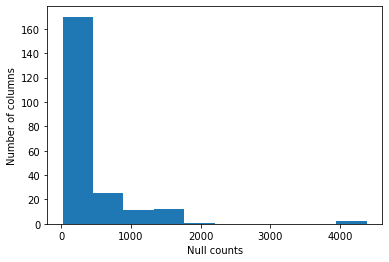

In [7]:
#Plot a histogram to see the null counts and the number of columns for each range of null counts
marks=np.array(null_counts[null_counts>0])
fig,ax=plt.subplots(1,1)
ax.hist(marks)
ax.set_xlabel('Null counts')
ax.set_ylabel('Number of columns')
plt.show()

In [8]:
#Create a frequency table for each range of null counts and the corresponding number of columns.
null_counts[null_counts>0].value_counts(bins=20)

(14.632, 237.35]     89
(237.35, 455.7]      81
(674.05, 892.4]      17
(1547.45, 1765.8]    10
(455.7, 674.05]       8
(892.4, 1110.75]      8
(1110.75, 1329.1]     3
(4167.65, 4386.0]     2
(1329.1, 1547.45]     2
(1765.8, 1984.15]     1
(1984.15, 2202.5]     0
(2420.85, 2639.2]     0
(2639.2, 2857.55]     0
(2857.55, 3075.9]     0
(3075.9, 3294.25]     0
(3294.25, 3512.6]     0
(3512.6, 3730.95]     0
(3730.95, 3949.3]     0
(3949.3, 4167.65]     0
(2202.5, 2420.85]     0
dtype: int64

Based on the histogram, most columns have less than 456 null values (approximately 10% of the data). I will drop columns with more than 10% of null values (using the process_missing function later).

Now, I will explore object columns.

In [9]:
data.select_dtypes(include=['object'])

,Unnamed: 0,Sector
0,CMCSA,Consumer Cyclical
1,KMI,Energy
2,INTC,Technology
3,MU,Technology
4,GE,Industrials
...,...,...
4387,YRIV,Real Estate
4388,YTEN,Basic Materials
4389,ZKIN,Basic Materials
4390,ZOM,Industrials


There are two object columns: 'Unnamed: 0' and 'Sector'. Let's explore more about these two columns.

In [10]:
data['Sector'].isnull().sum()

0

In [11]:
data['Unnamed: 0']

0       CMCSA
1         KMI
2        INTC
3          MU
4          GE
        ...  
4387     YRIV
4388     YTEN
4389     ZKIN
4390      ZOM
4391     ZYME
Name: Unnamed: 0, Length: 4392, dtype: object

In [12]:
data.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', '2019 PRICE VAR [%]', 'Class'],
      dtype='object', length=225)

There is 0 null value for 'Sector' column. The column 'Unnamed: 0' has 4392 unique values (equal to the length of the dataset). I suppose these are the ticker symbols for each company (e.g. CMCSA is Comcast, KMI is Kinder Morgan Inc, etc.). Therefore, this column ('Unnamed: 0') will be dropped.

In [13]:
#Drop columns with high number of null counts (more than 10%), drop 'Unnamed: 0' column and remove rows with missing values.
def process_missing(df):
    df=df.drop(['Unnamed: 0'],axis=1)
    #Drop columns with more than 10% missing values
    numeric_cols_nulls=df[numeric_cols].isnull().sum()/len(df)
    numeric_drop=numeric_cols_nulls[numeric_cols_nulls>0.1].index
    df=df.drop(numeric_drop,axis=1)
    #Drop rows with missing values
    df=df.dropna(axis=0)
    return df

data=process_missing(data)

In the above function, I also drop rows with missing values instead of replacing them with the columns' statistics. For instance, columns such as 'Revenue Growth', 'Gross Profit', 'Inventory Growth', etc. are each distinct for each company. Each value is dependent on other columns so replacing it with the statistics will add inaccurate information to the data.

## Features engineering

I will explore correlation between features and target column and then detect potential collinearity between each pair of features.

In [14]:
#Remove columns with low correlation with Class
def correlation(df):
    correlation=data.corr()['Class'].abs()
    low_corr=correlation[correlation<0.1].index
    df=df.drop(low_corr,axis=1)
    return df

data=correlation(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 0 to 4391
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Operating Income              3267 non-null   float64
 1   Earnings before Tax           3267 non-null   float64
 2   Net Income                    3267 non-null   float64
 3   Net Income Com                3267 non-null   float64
 4   Dividend per Share            3267 non-null   float64
 5   EBITDA                        3267 non-null   float64
 6   EBIT                          3267 non-null   float64
 7   Consolidated Income           3267 non-null   float64
 8   operatingProfitMargin         3267 non-null   float64
 9   longtermDebtToCapitalization  3267 non-null   float64
 10  totalDebtToCapitalization     3267 non-null   float64
 11  Market Cap                    3267 non-null   float64
 12  Sector                        3267 non-null   object 
 13  201

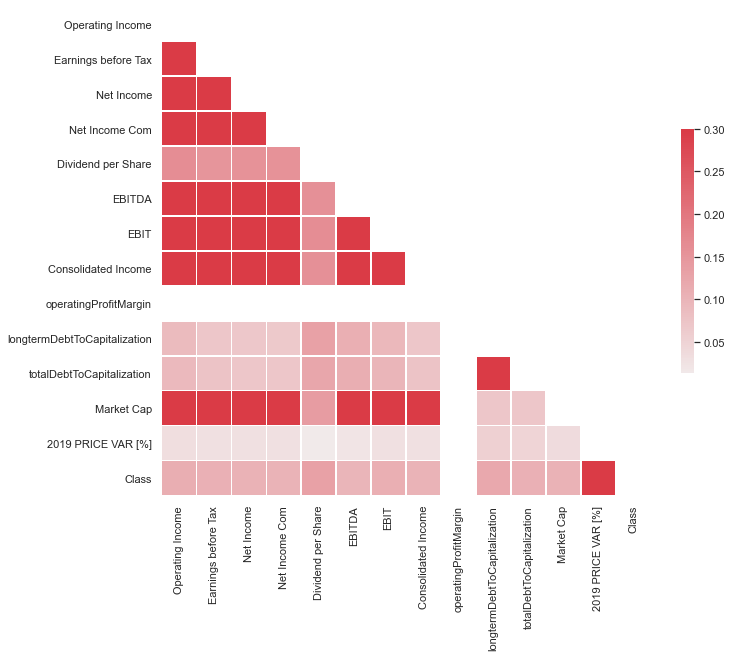

In [16]:
#Plotting correlations
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(data)

In [17]:
#Detecting collinearity and remove those columns (with correlation of more than 0.5)
def collinearity(df, threshold):
    result=df['Class']
    df=df.drop(['Class'],axis=1)
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    df['Class']=result
    return df

data=collinearity(data,0.5)

In [18]:
data.select_dtypes(include='object').columns

Index(['Sector'], dtype='object')

The only object column left is 'Sector'. I believe that this is a good indicator for the change in price. Let's create dummy columns for this column.

In [19]:
def create_dummies(df):
    col=df.select_dtypes(exclude=['number']).columns
    dummies = pd.get_dummies(df[col],prefix=col)
    df = pd.concat([df,dummies],axis=1)
    df=df.drop(col,axis=1)
    return df

data=create_dummies(data)

In [20]:
data.columns

Index(['Operating Income', 'Dividend per Share', 'operatingProfitMargin',
       'longtermDebtToCapitalization', '2019 PRICE VAR [%]', 'Class',
       'Sector_Basic Materials', 'Sector_Communication Services',
       'Sector_Consumer Cyclical', 'Sector_Consumer Defensive',
       'Sector_Energy', 'Sector_Financial Services', 'Sector_Healthcare',
       'Sector_Industrials', 'Sector_Real Estate', 'Sector_Technology',
       'Sector_Utilities'],
      dtype='object')

## Testing different models

In [21]:
#Splitting the data into train and test dataset.
def train_and_test(df, k):
    random.seed(10)
    kf=KFold(n_splits=k, shuffle=True)
    for train_index, test_index, in kf.split(df):
        train = df.iloc[train_index]
        test = df.iloc[test_index] 
    return train,test

In [22]:
train,test=train_and_test(data,5)

In [23]:
#Inside train and test, split each into the feature columns and target column.
y_train=train['Class']
x_train=train.drop(['Class'],axis=1)
y_test=test['Class']
x_test=test.drop(['Class'],axis=1)

I will test the following models using grid search: Logistic Regression, K-Neighbors Classifier and Random Forest Classifier. The model, along with its parameters, with the highest score will be chosen.

In [24]:
def select_model(df,features):
    all_y=df['Class']
    all_X=df.drop(['Class'],axis=1)
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]
    for model in models:
        print("Name of model:", model['name'])
        k=model['estimator']
        grid=GridSearchCV(k,param_grid=model['hyperparameters'],cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))
        print("---------")

        

In [25]:
select_model(train,train.columns)

Name of model: LogisticRegression
Best Score: 0.9980872159340176
Best Parameters: {'solver': 'newton-cg'}

---------
Name of model: KNeighborsClassifier
Best Score: 0.7092348863736071
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

---------
Name of model: RandomForestClassifier
Best Score: 1.0
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6}

---------


Based on the result, the model with the best score is Random Forest Classifier. The optimal hyperparameters for this model are: 
- criterion='entropy'
- max_depth= 10
- max_features='log2'
- min_samples_leaf= 1
- min_samples_split= 2
- n_estimators= 9

I will use the above model to make a prediction for the test set.

In [26]:
model=RandomForestClassifier(criterion='entropy',max_depth= 10,max_features='log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 9)
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [27]:
#Testing the first few predictions
predictions[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In classification problem, it is important to checkout the true positive rate (how well the model accurately predicts positive outcome) and the true negative rate (how well the model accurately predicts negative outcome). In this particular project, both the predictions for price increase or decrease are equally important so let's explore both rates.

In [28]:
test['labels']=predictions
true_positive=len(test[(test['Class']==1) & (test['labels']==1)])
true_negative=len(test[(test['Class']==0) & (test['labels']==0)])
false_positive=len(test[(test['Class']==0) & (test['labels']==1)])
false_negative=len(test[(test['Class']==1) & (test['labels']==0)])
TPR=true_positive/(true_positive+false_negative)
TNR=true_negative/(true_negative+false_positive)


In [29]:
print('The true positive rate is: ',TPR)
print('The true negative rate is: ',TNR)

The true positive rate is:  1.0
The true negative rate is:  1.0
